In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [11]:
data = pd.read_excel('online_retail_II.xlsx')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [14]:
data = data.dropna(subset=['Customer ID'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417534 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      417534 non-null  object        
 1   StockCode    417534 non-null  object        
 2   Description  417534 non-null  object        
 3   Quantity     417534 non-null  int64         
 4   InvoiceDate  417534 non-null  datetime64[ns]
 5   Price        417534 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      417534 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.7+ MB


In [22]:
# Creating a function to extract month and year to create a new column for our cohort month
import datetime as dt
def get_month(x):
    return dt.datetime(x.year,x.month,1)
data['InvoiceMonth'] = data['InvoiceDate'].apply(get_month)


In [23]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01


In [25]:
# Creating a column about when we acquired the customer (first transaction)
data['acquired_month'] = data.groupby(by='Customer ID')['InvoiceMonth'].transform('min')
data.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth,acquired_month
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,2010-12-01,2009-12-01
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01,2009-12-01
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01,2009-12-01
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01,2009-12-01
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom,2010-12-01,2009-12-01


In [27]:
# Create a date element function to get a series for subtraction
def get_date_elements(df,column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day,month,year
acq_day,inv_month,inv_year = get_date_elements(data,'InvoiceMonth')
acq_day,acq_month,acq_year = get_date_elements(data,'acquired_month')

In [29]:
# Cohort Index
year_difference = inv_year - acq_year
month_difference = inv_month - acq_month
data['cohortindex'] = year_difference * 12 + month_difference + 1
data.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth,acquired_month,cohortindex
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,2010-12-01,2009-12-01,13
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01,2009-12-01,13
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01,2009-12-01,13
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01,2009-12-01,13
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom,2010-12-01,2009-12-01,13


In [31]:
# Count the customer ID's
cohort_data = data.groupby(['acquired_month','cohortindex'])['Customer ID'].apply(pd.Series.nunique).reset_index()
cohort_data

,acquired_month,cohortindex,Customer ID
0,2009-12-01,1,1045
1,2009-12-01,2,392
2,2009-12-01,3,358
3,2009-12-01,4,447
4,2009-12-01,5,410
...,...,...,...
86,2010-10-01,2,112
87,2010-10-01,3,39
88,2010-11-01,1,322
89,2010-11-01,2,38


In [60]:
# create a pivot table 
cohort_table = cohort_data.pivot(index='acquired_month', columns=['cohortindex'],values='Customer ID')


In [61]:
cohort_table.index = cohort_table.index.strftime('%B %Y')

<AxesSubplot:xlabel='cohortindex', ylabel='acquired_month'>

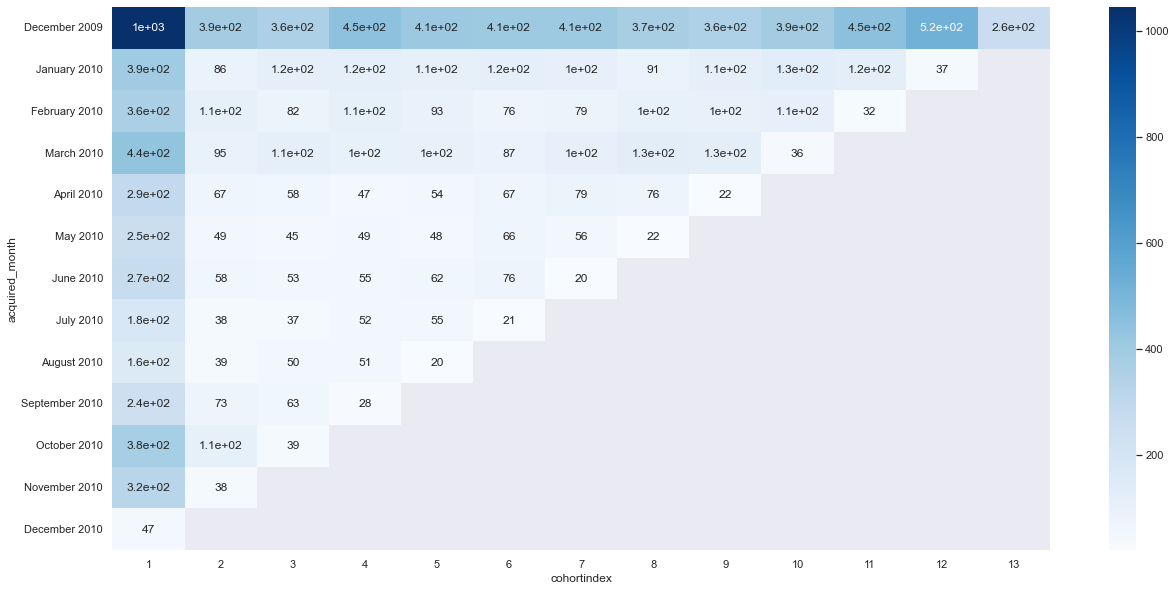

In [63]:
plt.figure(figsize=(21,10))
sns.heatmap(cohort_table,annot=True,cmap='Blues')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417534 entries, 0 to 525460
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Invoice         417534 non-null  object        
 1   StockCode       417534 non-null  object        
 2   Description     417534 non-null  object        
 3   Quantity        417534 non-null  int64         
 4   InvoiceDate     417534 non-null  datetime64[ns]
 5   Price           417534 non-null  float64       
 6   Customer ID     417534 non-null  float64       
 7   Country         417534 non-null  object        
 8   InvoiceMonth    417534 non-null  datetime64[ns]
 9   acquired_month  417534 non-null  datetime64[ns]
 10  cohortindex     417534 non-null  int64         
dtypes: datetime64[ns](3), float64(2), int64(2), object(4)
memory usage: 38.2+ MB


In [67]:
# Goods sold
data['Total_Sales'] = data['Quantity'] * data['Price']
cohort_data3 = data.groupby(['acquired_month', 'cohortindex'])['Total_Sales'].mean().reset_index()
average_sales  = cohort_data3.pivot_table(index = 'acquired_month',
                                           columns = 'cohortindex',
                                      values = 'Total_Sales').round(1)
average_sales.index = average_sales.index.strftime('%B %Y')
average_sales

cohortindex,1,2,3,4,5,6,7,8,9,10,11,12,13
acquired_month,,,,,,,,,,,,,
December 2009,20.9,29.7,23.7,24.9,22.3,21.1,21.9,25.2,29.1,24.9,25.1,24.2,27.7
January 2010,15.7,20.7,15.5,18.8,18.3,21.6,17.9,17.1,19.7,19.2,19.8,13.8,NaN
February 2010,16.3,15.2,22.4,17.5,16.0,18.1,17.8,17.0,16.0,16.7,17.1,NaN,NaN
March 2010,13.6,20.8,17.1,16.3,17.0,19.7,20.6,18.1,16.8,20.5,NaN,NaN,NaN
April 2010,15.4,15.3,17.5,27.1,18.9,18.6,16.1,15.4,13.0,NaN,NaN,NaN,NaN
May 2010,16.5,16.2,17.3,17.1,22.3,14.9,13.0,9.2,NaN,NaN,NaN,NaN,NaN
June 2010,10.8,10.9,18.6,16.3,16.1,18.8,20.2,NaN,NaN,NaN,NaN,NaN,NaN
July 2010,13.3,13.5,11.3,14.5,13.1,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2010,12.5,15.7,16.6,14.6,19.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


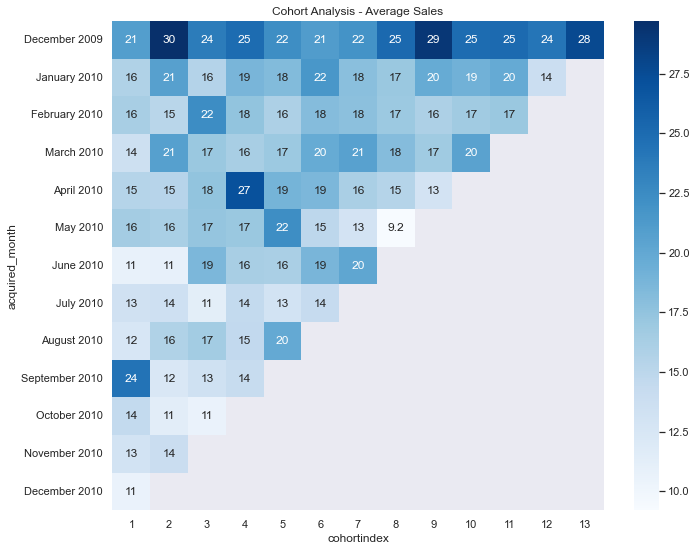

In [68]:

plt.figure(figsize = (11,9))
plt.title('Cohort Analysis - Average Sales')
sns.heatmap(data = average_sales, 
            annot = True, 
            cmap = "Blues")
plt.show()